In [1]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

In [2]:
# Load data and display first rows
market_df = pd.read_csv('../DataForLab/Smarket.csv',index_col=0)

# Load the caravan insurance data for section 4.6.6
caravan_df = pd.read_csv('../DataForLab/Caravan.csv', index_col=0)

In [3]:
print(market_df.head(3))
print(market_df.describe())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.000

In [4]:
caravan_df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


Below computes a p * p matrix of correlation using pandas `corr`
- notice that the there is little correlation between lags
- only meaningful correlation is year and volume

In [5]:
# Compute correlation coeffecient matrix
corr_matrix = market_df.corr(method='pearson')
print(corr_matrix)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


C:\Users\Admin\AppData\Local\Temp\ipykernel_896\3470304230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = market_df.corr(method='pearson')


We can prove that volume is trending up with year by plotting the scatter
- note: data is ordered chronologically, so 1st row relates to day 1

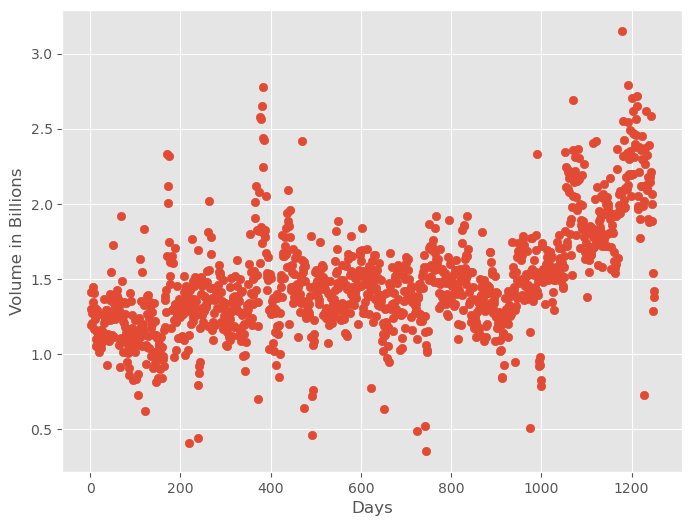

In [6]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(market_df.index, market_df.Volume.values);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

Notice below `lag 1` has the lowest P of 14.5%, but even then its not a good enough alpha

In [7]:
# Get the lag and volume column names
predictors = market_df.columns[1:7]
# Create the design matrix
X = sm.add_constant(market_df[predictors])

Y = pd.Series([1 if dir == "Up" else 0 for dir in market_df["Direction"]],market_df.index)
#see documentation for pd.Series

logit = sm.Logit(Y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 May 2023   Pseudo R-squ.:                0.002074
Time:                        12:45:38   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

The logit predictor predicts YES if prob > 0.5

In [8]:
# get the first 10 predictions for the training data set
training_predictions = results.predict(X[:10])
#choose all column, but only up to first 10 rows
print(training_predictions)

# convert the probabilities to 'Up' or 'Down' qualitative variables
direction_predictions = ['Up' if el > 0.5 else 'Down' for el in training_predictions]
direction_predictions[:10]

1     0.507084
2     0.481468
3     0.481139
4     0.515222
5     0.510781
6     0.506956
7     0.492651
8     0.509229
9     0.517614
10    0.488838
dtype: float64


['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down']

the predictions are the downwards, while the actual are rightwards
The diagonals show the actual correct predictions (true down down and true up up)


In [9]:
# we can now build a confusion matrix to asses the correct and incorrect predictions. 
table = results.pred_table(threshold=0.5)
tableT = table.T

confusion_df = pd.DataFrame(tableT,['Down','Up'],['Down','Up'])
confusion_df["Total"] = confusion_df["Down"] + confusion_df["Up"]
print(confusion_df)
print('')
print('The model made', 
      (confusion_df.Down[0]+confusion_df.Up[1])/confusion_df[["Down","Up"]].sum().sum(), '% correct predictions on the TRAINING SET.')
print("in other words, for the training set the model made 141 wrong predictions for those that actually went up and 457 that actually went down")
#sum().sum() sums the columns, then the rows for a grand total



       Down     Up  Total
Down  145.0  141.0  286.0
Up    457.0  507.0  964.0

The model made 0.5216 % correct predictions on the TRAINING SET.
in other words, for the training set the model made 141 wrong predictions for those that actually went up and 457 that actually went down


We now split the data into training and test data set

In [10]:
# Split the data into training and test dataframes
training_df = market_df[market_df["Year"]<2005]
test_df = market_df[market_df["Year"]==2005]

# Compute Training Coeffecients #
#################################
# Use the lags and volume as predictors for the years 2001 to 2004 (training set)
predictors = training_df.columns[1:7]
# Create the design matrix for the training_df
X_train = sm.add_constant(training_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = pd.Series([1 if el=='Up' else 0 for el in training_df["Direction"]],index=X_train.index)
# fit the model and return the training results
train_logit = sm.Logit(Y_train,X_train)
train_results = train_logit.fit()

# Make Predictions on Test Set #
################################
# make a design matrix for the testing data
X_test = sm.add_constant(test_df[predictors])

# Encode the response as 0,1 for down/up for response variable of the test set
Y_test = pd.Series([1 if el=='Up' else 0 for el in test_df.Direction.values],index=X_test.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions = train_results.predict(X_test)

# Convert the probability predictions to a binary prediction
prediction_array = np.array(test_predictions > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array == Y_test),'% correct predictions on the TEST SET.')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array, Y_test, bins=2)[0]
pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up'])

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4

 The model made 0.4801587301587302 % correct predictions on the TEST SET.


,Down,Up
Down,77.0,97.0
Up,34.0,44.0


We recall that the logistic regression model had very underwhelming pvalues associated with all of the predictors, and that the smallest p-value, though not very small, corresponded to Lag1. Perhaps by removing the variables that appear not to be helpful in predicting Direction, we can obtain a more effective model.

In [13]:
# Compute Reduced Training Model Coeffecients #
###############################################
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']
X_train_red = sm.add_constant(training_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train_red = pd.Series([1 if el=='Up' else 0 for el in training_df["Direction"]],index=X_train_red.index)
# fit the model and return the training results
train_logit_red = sm.Logit(Y_train_red,X_train_red)
train_results_red = train_logit_red.fit()

# Make Predictions on Test Set #
################################
# make design matrix for testing data
X_test_red = sm.add_constant(test_df[predictors])
# Encode the response as 0,1 for down/up for response variable of the test set
Y_test_red = pd.Series([1 if el=='Up' else 0 for el in test_df["Direction"]],index=X_test_red.index)

# now use the training coeffecients to make predictions about the returns of the testing set (year=2005)
test_predictions_red = train_results_red.predict(X_test_red)

# Convert the probability predictions to a binary prediction; i.e. returns true false
prediction_array_red = np.array(test_predictions_red > 0.5, dtype=float)

# print the percentage of correct predictions
print('')
print(' The model made', np.mean(prediction_array_red == Y_test_red),
      '% correct predictions on the TEST SET using', predictors, 'predictors.')
print('')

# Compute Test Confusion Matrix #
#################################
# Stats models doesn't have an option for a confusion matrix for test sets-- we build one by hand using
# hsitogram2d
table = np.histogram2d(prediction_array_red, Y_test_red, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('On days where the previous day was \'Up\' the probability the market will be \'Up\' is',
      table[1][1]/(table[1][0]+table[1][1]))
print("i.e. P(true up / (true up + predicted up))")

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3

 The model made 0.5595238095238095 % correct predictions on the TEST SET using ['Lag1', 'Lag2'] predictors.

[[ 35.  35.]
 [ 76. 106.]]
      Down     Up
Down  35.0   35.0
Up    76.0  106.0

On days where the previous day was 'Up' the probability the market will be 'Up' is 0.5824175824175825
i.e. P(true up / (true up + predicted up))


Now we will perform LDA, using `Lag1` and `Lag2` data

In [16]:
# use lag 1 and lag 2 as the predictors
predictors = ['Lag1','Lag2']

X_train = training_df[predictors].values
# Encode the response as 0,1 for down/up for response variable of the training set
Y_train = np.array([1 if el=='Up' else 0 for el in training_df.Direction.values])

# Create Classifier
lda_clf = LDA(solver='lsqr',store_covariance=True)
# Fit model
lda_clf.fit(X_train,Y_train)

print('Class Priors =', lda_clf.priors_)
print('LDA Class Means =', lda_clf.means_)
print('LDA Coefficients =', lda_clf.coef_)

Class Priors = [0.492 0.508]
LDA Class Means = [[ 0.0428  0.0339]
 [-0.0395 -0.0313]]
LDA Coefficients = [[-0.0556 -0.0444]]


notice for the `x_min` and `x_max` and the related y axis equivalent, the limits are already determined when we populated the scatter plot!


C:\Users\Admin\AppData\Local\Temp\ipykernel_896\1782050340.py:37: UserWarning: The following kwargs were not used by contour: 'clabel'
  cp = ax.contour(xx, yy, Z, [.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');


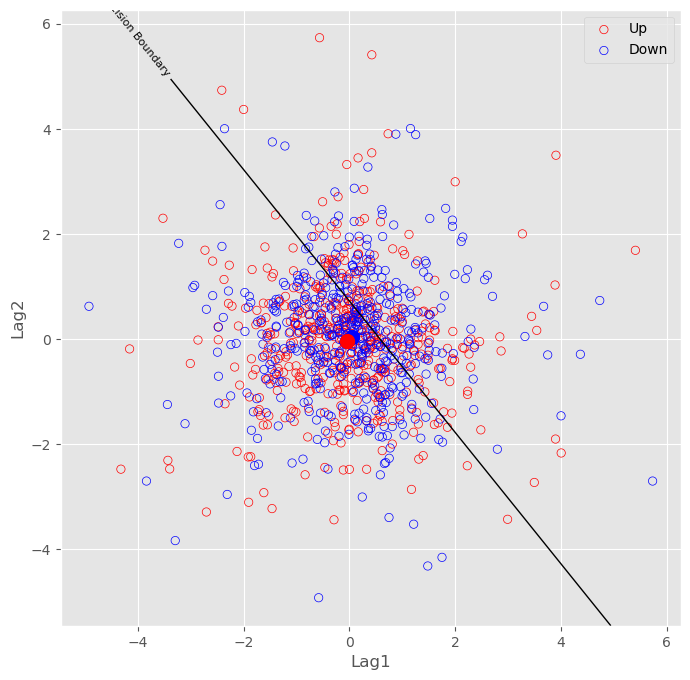

In [104]:
# Make a scatter plot of the lag predictors and show the Bayes decision boundary

# Scatter plot the data colored by market direction #
#####################################################
fig, ax = plt.subplots(figsize=(8,8))
# Plot the training lags color coded by market direction
# the scatter is by x = lag 1 and y = lag 2
# red = up , blue = down
ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], facecolors='none', edgecolors='r', label='Up')
ax.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], facecolors='none', edgecolors='b', label='Down')

# Calculate Bayes Decision Boundary #
#####################################
# Construct a meshgrid to calulate Bayes Boundary over
nx, ny = 200, 200 #spacing, i.e. you expect to have 200 equally spaced steps
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
# linspace creates an array that spaces out the min and max by the given steps in nx ny
# meshgrid converts that into 200 * 200 coordinate grid as given by the spacing
# basically purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

Z = lda_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Use predict_proba to calculate Decision Boundary Probability at each x1,x2 pair, returns in axes form
#np.c_ converts the 2 different arrays of arrays into a single array of pairs i.e. x1, x2
# there is 80K elements in Z , responding to 200*200 * 2 axes
# Z is in pairs

Z = Z[:, 1].reshape(xx.shape)

# choose all rows, and only index 1 column (i.e. we only interested in the height)
# we dont care about the width (x) because the meshgrid's shape directly matches our height for each point in height, and is also strictly monotonic upwards
# in reality I would think that just attempting to draw a line is also possible
# reshape to the form that xx was in

# The Bayes Boundary for k=2 classes is the contour where P(Y=k|X=x) = 0.5
cp = ax.contour(xx, yy, Z, [.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');
# the level in the contour argument is being set as 0.5, so where f(x,y) = 0.5
# xx yy and Z must be in the same shape
# Z controls the height, we only took the height coordinates from the above reshape
plt.clabel(cp, inline=True, fmt='Bayes Decision Boundary',fontsize=8)

# Plot mean lag vector (lag1,lag2) for each class 'Up' and 'Down' #
###################################################################
ax.plot(lda_clf.means_[0][0], lda_clf.means_[0][1], 'o', color='blue', markersize=10);
ax.plot(lda_clf.means_[1][0], lda_clf.means_[1][1], 'o', color='red', markersize=10);

ax.set_xlabel('Lag1')
ax.set_ylabel('Lag2')
ax.legend(loc='best');

In [99]:
# Get the models predictions for market directions on the test set
Y_predict = lda_clf.predict(test_df[predictors].values)
Y_predict = np.array(Y_predict > 0.5, dtype=float)
# get the actual market directions from the testing dataframe
Y_test = np.array([1 if el=='Up' else 0 for el in test_df["Direction"]])

# Compute Test Confusion Matrix #
#################################
table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
# 0 only returns the values
# 1 and 2 returns the classification bins , being 0 , 0.5 and 1

print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
# same results as using the logistic function

      Down     Up
Down  35.0   35.0
Up    76.0  106.0


### QDA

In [100]:
# Create a new classifier & Fit Training Data 
clf_qda = QDA()
clf_qda.fit(X_train, Y_train)
print('Class Priors =', clf_qda.priors_)
print('Class Means =', clf_qda.means_)
# Since we are using a quadratic model there are no coeffecients of linear discriminants

Class Priors = [0.492 0.508]
Class Means = [[ 0.0428  0.0339]
 [-0.0395 -0.0313]]


In [101]:
# Make predictions using the model on the test set
# Get the models predictions for market directions on the test set
Y_predict = clf_qda.predict(test_df[predictors].values)
Y_predict = np.array(Y_predict > 0.5, dtype=float)
# get the actual market directions from the testing dataframe
Y_test = np.array([1 if el=='Up' else 0 for el in test_df.Direction.values])

# Compute Test Confusion Matrix #
#################################
table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f}% correct predictions'.format(100*np.mean(Y_predict==Y_test)))

      Down     Up
Down  30.0   20.0
Up    81.0  121.0

The model makes 59.9206 correct predictions


C:\Users\Admin\AppData\Local\Temp\ipykernel_896\393022795.py:22: UserWarning: The following kwargs were not used by contour: 'clabel'
  cp = ax.contour(xx, yy, Z, [0.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');


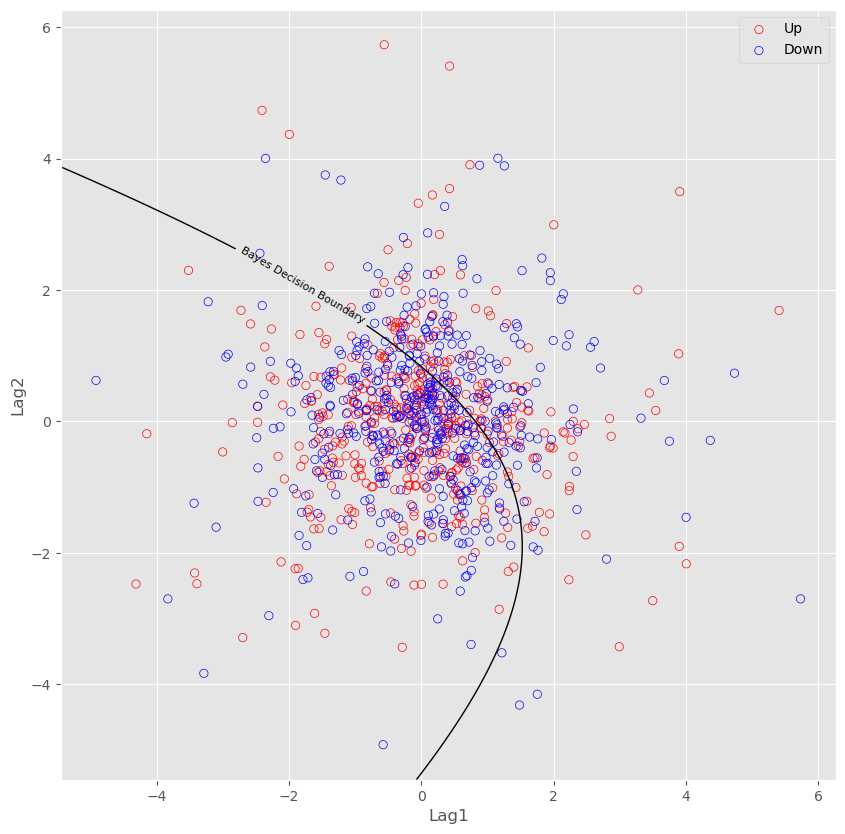

In [105]:
# Make a scatter plot of the lag predictors and show the Bayes decision boundary

# Scatter plot the data colored by market direction #
#####################################################
fig, ax = plt.subplots(figsize=(10,10))
# Plot the training lags color coded by market direction
ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], facecolors='none', edgecolors='r', label='Up')
ax.scatter(X_train[Y_train==0][:,0],X_train[Y_train==0][:,1], facecolors='none', edgecolors='b', label='Down')

# Calculate Bayes Decision Boundary #
#####################################
# Construct a meshgrid to calulate Bayes Boundary over
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# Use predict_proba to calculate Probability at each x1,x2 pair
Z = clf_qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# The Bayes Boundary for k=2 classes is the contour where P(Y=k|X=x) = 0.5
cp = ax.contour(xx, yy, Z, [0.5], linewidths=1., colors='k',clabel='Bayes Decision Boundary');
plt.clabel(cp, inline=True, fmt='Bayes Decision Boundary',fontsize=8);
ax.set_xlabel('Lag1')
ax.set_ylabel('Lag2')
ax.legend(loc='best');

In [107]:
# Build a KNN classifier 
training_labels = training_df["Direction"]
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, training_labels)

KNeighborsClassifier(n_neighbors=1)

In [112]:
# Make predictions using the model on the test set the predictors are still lag1 and lag2
# Get the models predictions for market directions on the test set
predicted_labels = knn_1.predict(test_df[predictors].values)
# get the actual market directions from the testing dataframe
testing_labels = test_df.Direction.values

# Compute Test Confusion Matrix #
#################################
predicted_values = np.array([1 if el=='Up' else 0 for el in predicted_labels])
testing_values = np.array([1 if el=='Up' else 0 for el in testing_labels])
                            
table = np.histogram2d(predicted_values, testing_values , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f}% correct predictions'.format(100*np.mean(predicted_values==testing_values)))

      Down    Up
Down  43.0  58.0
Up    68.0  83.0

The model makes 50.0000% correct predictions


In [121]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, training_labels)

# Make predictions using the model on the test set the predictors are still lag1 and lag2
# Get the models predictions for market directions on the test set
predicted_labels = knn_3.predict(test_df[predictors].values)
# get the actual market directions from the testing dataframe
testing_labels = test_df["Direction"]

# Compute Test Confusion Matrix #
#################################
predicted_probabilities = np.array([1 if el=='Up' else 0 for el in predicted_labels])
testing_values = np.array([1 if el=='Up' else 0 for el in testing_labels])
                            
table = np.histogram2d(predicted_probabilities, testing_values , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('The model makes {0:.4f}% correct predictions'.format(100*np.mean(predicted_probabilities==testing_values)))


      Down    Up
Down  48.0  55.0
Up    63.0  86.0

The model makes 53.1746% correct predictions


## K-Nearest Neighbors Applied to Caravan Insurance Data

In [151]:
np.random.seed(0)
# Standardize the Variables #
#############################
X = scale(caravan_df.iloc[:,0:85].values, axis=0)
# check that X[:,1] is now standardized
#print('mean =', np.mean(X[:,0]), 'variance = ', np.var(X[:,0]))

# Split the Data #
##################
# Get the response variable coding 0's and 1's
Y = np.array([1 if el=='Yes' else 0 for el in caravan_df.Purchase.values])

# Choose a random subset of the data, note the text does not randomly choose but it is a good idea
# number of testing points
num_test_points = 1000

points = np.random.choice([False,True],size=len(X), p=[1-num_test_points/len(X) ,num_test_points/len(X)])
#all rows of predictors are marked either false or true
#our p here is completely arbitrary in formula
#Trus to be used in training set, others in test set
#if you attempt to find number of true in points, you should get about 996 samples (around 1000!)

# we mark the probability of being False to be 1 - num_test_points/len(x)
# probability of being true to be the complomenet

# Split the data into training and testing sets and get the responses
X_train = X[~points] 
# ~ means complement to points
X_test = X[points]

# Build a k=1 neighbor classifier from the training data #
##########################################################
num_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]
# get the error rate
error_rate = np.mean(predicted_labels != actual_labels)
print('The error rate for k={0:d} is {1:.3f} %'.format(num_neighbors, 100*error_rate))
# Note that the number of people who bought car insurance was just under 6% so if we always predicted no we would 
# get an error rate of 6%

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'
        .format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))

The error rate for k=1 is 11.446 %
        No   Yes
No   875.0  47.0
Yes   67.0   7.0

There were 74 customers predicted to buy insurance. The actual number who purchased was 7. This gives 9.459 %


In [157]:
# Build a k=3 Neighbor Classifier #
###################################
num_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'.format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))


        No   Yes
No   924.0  51.0
Yes   18.0   3.0

There were 21 customers predicted to buy insurance. The actual number who purchased was 3. This gives 14.286 %


In [159]:
# Build a k=5 Neighbor Classifier #
###################################
num_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=num_neighbors)
Y_train = Y[~points]
knn.fit(X_train, Y_train)

# Make Label Predictions on the Test Data #
###########################################
predicted_labels = knn.predict(X_test)
actual_labels = Y[points]

# Make a confusion matrix #
###########################
table = np.histogram2d(predicted_labels, actual_labels , bins=2)[0]
# bins created are intervallic, so if bins = 2 we created 0 -  0.5 0.5 - 1 (inclusive) bin


print(pd.DataFrame(table, ['No', 'Yes'], ['No', 'Yes']))
print('')
print('There were {0:.0f} customers predicted to buy insurance. The actual number who purchased was {1:.0f}. This gives {2:.3f} %'.format(table[1,0]+table[1,1], table[1,1], 100*table[1,1]/(table[1,0]+table[1,1])))


(array([[996.]]), array([0., 1.]), array([0., 1.]))
        No   Yes
No   936.0  51.0
Yes    6.0   3.0

There were 9 customers predicted to buy insurance. The actual number who purchased was 3. This gives 33.333 %
